# Lead Scoring  for X Education ( Logistic Regression Case Study )

# 1. Importing libaries

In [1]:
#Importing important libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Setting max columns and colwidth 

pd.set_option('display.max_columns',100)
pd.set_option('display.max_colwidth', None)

In [4]:
# importing libraries for modeling

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix,precision_recall_curve
from sklearn.metrics import precision_score,recall_score


# 2. Reading data set

In [5]:
#Importing dataset 

leads_df=pd.read_csv('Leads.csv')
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
#Checking shape of dataframe

leads_df.shape

(9240, 37)

In [7]:
# Checking columnwise information

leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
#understanding data dictionary

dict_df=pd.read_excel('Leads Data Dictionary.xlsx',skiprows=[0],header=[1],usecols='B:C')
dict_df

,Variables,Description
0,Prospect ID,A unique ID with which the customer is identified.
1,Lead Number,A lead number assigned to each lead procured.
2,Lead Origin,"The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc."
3,Lead Source,"The source of the lead. Includes Google, Organic Search, Olark Chat, etc."
4,Do Not Email,An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
5,Do Not Call,An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
6,Converted,The target variable. Indicates whether a lead has been successfully converted or not.
7,TotalVisits,The total number of visits made by the customer on the website.
8,Total Time Spent on Website,The total time spent by the customer on the website.
9,Page Views Per Visit,Average number of pages on the website viewed during the visits.


In [9]:
# Checking null count for each column

leads_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
#Checking numerical columns data distribution

leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [11]:
leads_df_copy=leads_df.copy()

# 3.  Imbalance analysis

- Before proceeding with data preparation and modeling , we need to check data imbalance. We need to check whether data we have taken, is enough for modeling or not.

- lets use countplot for target column 'Converted'

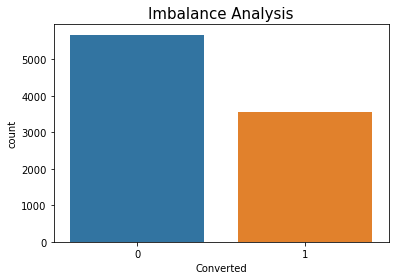

In [12]:
# Ploting countplot 

sns.countplot(leads_df['Converted'])
plt.title('Imbalance Analysis',fontsize=15)
plt.show()

In [13]:
print('Percentage of not converted leads',round(sum(leads_df['Converted']==0)/len(leads_df)*100,2))

Percentage of not converted leads 61.46


In [14]:
print('Percentage of converted successfully',round(sum(leads_df['Converted']==1)/len(leads_df)*100,2))

Percentage of converted successfully 38.54


In [15]:
print('Imbalance Ratio',round(sum(leads_df['Converted']==0)/sum(leads_df['Converted']==1),2))

Imbalance Ratio 1.59


Insight 
- We can see ~ 62:38 ratio . This means data is sightly imbalance . Hence we can proceed.

# 4. Data Cleaning

## 4.1 Sales columns need to be removed as this will not help for prediction

In [16]:
leads_df.drop(['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 
                      'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
        'Tags', 'Last Activity', 'Last Notable Activity'], 
        axis = 1, inplace = True)

## 4.2. Checking dublicates

In [17]:
#checking for all rows

sum(leads_df.duplicated())

0

Insight:
    
  -    All rows seem unique.
  - Now we will check for two columns which are already mentioned unique in data dictionary and will drop those as those will not be required for prediction.

In [18]:
# Lets check for 'Prospect ID'. 

sum(leads_df.duplicated(subset='Prospect ID'))

0

In [19]:
# Lets check for 'Lead Number'

sum(leads_df.duplicated(subset='Lead Number'))

0

### Dropping these columns Prospect ID and Lead Number as they are unique identifiers.

In [20]:
leads_df.drop(columns=['Prospect ID','Lead Number'],inplace=True)

In [21]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,NaN,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No
1,API,Organic Search,No,No,0,5.0,674,2.5,India,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,India,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No


## 4.3. Replacing 'Select' value with Null

In [22]:
# Replacing 'Select' value with null for all columns where we are having this.

leads_df=leads_df.replace('Select',np.nan)

## 4.4.  Handling null values and data imbalane

In [23]:
#Checking null percentage column wise

round((100*leads_df.isnull().sum()/len(leads_df)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

#### we can check columns having missing value one by one . Accordingly we will either impute or drop them.

- We will start with City as this column is having highest null percentage.

#### 4.4.1. Handling for City

In [24]:
# Lets check each valid value count including null

leads_df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

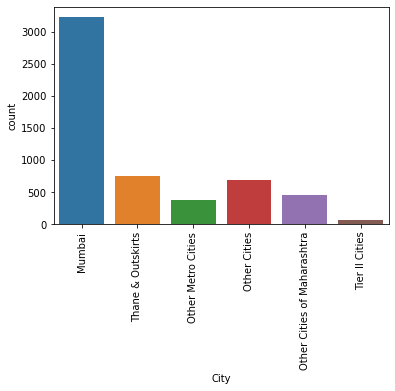

In [25]:
# Ploting city
sns.countplot(leads_df['City'])
plt.xticks(rotation=90)
plt.show()

**Insights**
- Here , missing data count is more than mode of column value. Even if we impute it with mode , there will be more than 70% data which will belong to mode value i.e. `Mumbai`. It will not help for prediction thus better to drop this column.

In [26]:
leads_df.drop('City',axis=1,inplace=True)

In [27]:
# Lets check again for remaining columns

round((100*leads_df.isnull().sum()/len(leads_df)),2).sort_values(ascending=False)

Specialization                                   36.58
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Lead Source                                       0.39
Lead Origin                                       0.00
Newspaper                                         0.00
I agree to pay the amount through cheque          0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Search                                            0.00
X Education Forums                                0.00
Newspaper Article                                 0.00
Magazine  

#### 4.4.2. Handling for Specialization

In [28]:
# Lets check each valid value count including null

leads_df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

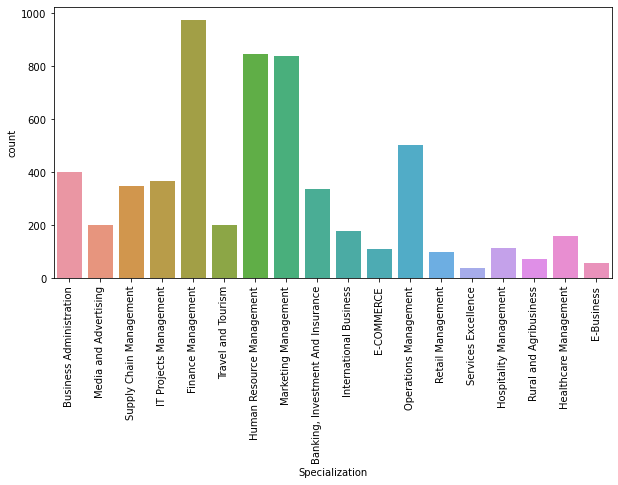

In [29]:
# Ploting Specialization
plt.figure(figsize=(10,5))
sns.countplot(leads_df['Specialization'])
plt.xticks(rotation=90)
plt.show()

**Insights** 
 - we can see the significant difference b/w missing values and other specialization.
 - This may be due to specialiization they have, is not listed out in dropdown item or may be they are student who dont have specializatio yet.

#### As these differnces we cant neglect or impute with any of existing value. Let's proceed with another new catergory i.e 'Not Specified' for imputation.

In [30]:
leads_df['Specialization']=leads_df['Specialization'].replace(np.nan,'Not Specified')

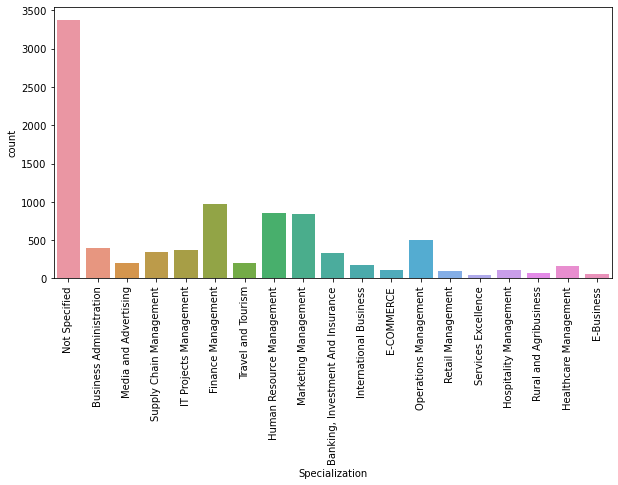

In [31]:
# Ploting again
plt.figure(figsize=(10,5))
sns.countplot(leads_df['Specialization'])
plt.xticks(rotation=90)
plt.show()

**Insights** 
- we can still see column data is highly skewed . To remove bias among them , we can combine categories which belong to similar line.
- Here we can see, some management specializations are showing similar trends.
- Same, some business specializations are showing similar trends. 
- Let's combine them together which are with low count to remove bias

In [32]:
## Management specialization

leads_df['Specialization']=leads_df['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management'],'Management Specializations')

In [33]:
## Management specialization

leads_df['Specialization']=leads_df['Specialization'].replace(['Business Administration','International Business','Rural and Agribusiness','E-Business'],'Business Specializations')

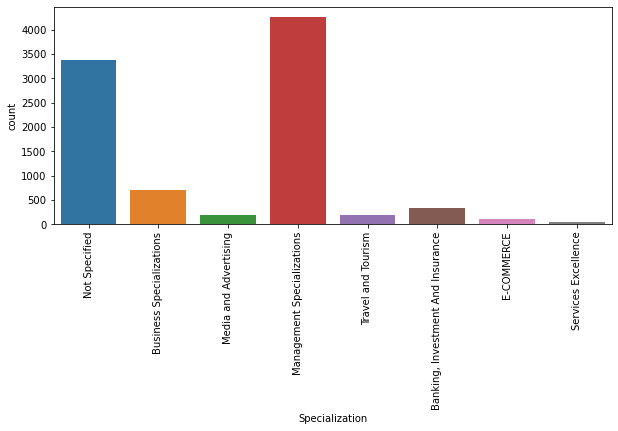

In [34]:
# Ploting again
plt.figure(figsize=(10,4))
sns.countplot(leads_df['Specialization'])
plt.xticks(rotation=90)
plt.show()

In [35]:
# Lets check again for remaining columns

round((100*leads_df.isnull().sum()/len(leads_df)),2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Lead Source                                       0.39
Lead Origin                                       0.00
X Education Forums                                0.00
I agree to pay the amount through cheque          0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Search                                            0.00
Newspaper Article                                 0.00
Magazine                                          0.00
Specializa

#### 4.4.3. Handling for `What matters most to you in choosing a course`

In [36]:
# Lets check each valid value count including null

leads_df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

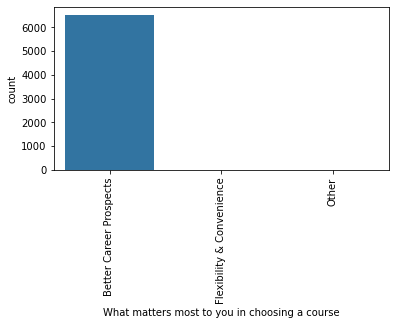

In [37]:
# Ploting 'What matters most to you in choosing a course'
plt.figure(figsize=(6,3))
sns.countplot(leads_df['What matters most to you in choosing a course'])
plt.xticks(rotation=90)
plt.show()

**Insight**:
   - 30% data is missing and rest ~ 69% is for `Better Career Prospects`. Even if we replace null values with `Better Career Prospect`, the whole column will have only one major value which will not help in prediction. So better to drop this column.

In [38]:
leads_df.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [39]:
# Lets check again for remaining columns

round((100*leads_df.isnull().sum()/len(leads_df)),2).sort_values(ascending=False)

What is your current occupation             29.11
Country                                     26.63
TotalVisits                                  1.48
Page Views Per Visit                         1.48
Lead Source                                  0.39
Lead Origin                                  0.00
X Education Forums                           0.00
I agree to pay the amount through cheque     0.00
Get updates on DM Content                    0.00
Update me on Supply Chain Content            0.00
Receive More Updates About Our Courses       0.00
Through Recommendations                      0.00
Digital Advertisement                        0.00
Newspaper                                    0.00
Search                                       0.00
Newspaper Article                            0.00
Magazine                                     0.00
Specialization                               0.00
Total Time Spent on Website                  0.00
Converted                                    0.00


#### 4.4.4. Handling for `What is your current occupation`

In [40]:
# Lets check each valid value count including null

leads_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

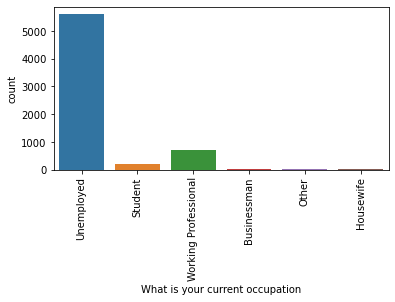

In [41]:
# Ploting 'What matters most to you in choosing a course'
plt.figure(figsize=(6,3))
sns.countplot(leads_df['What is your current occupation'])
plt.xticks(rotation=90)
plt.show()

**Insights**: 
 - We can see almost 30% data missing and 'Unemployed' is most common value covering almost 60% of data. Better if we define one new category `Not Specified` to replace null.
 - Also we can see data imbalance for other valid values because of low count. We can merge those valid value to `Others`.

In [42]:
leads_df['What is your current occupation']=leads_df['What is your current occupation'].replace(np.nan,'Not Specified')

In [43]:
leads_df['What is your current occupation']=leads_df['What is your current occupation'].replace(['Housewife','Businessman'],'Other')

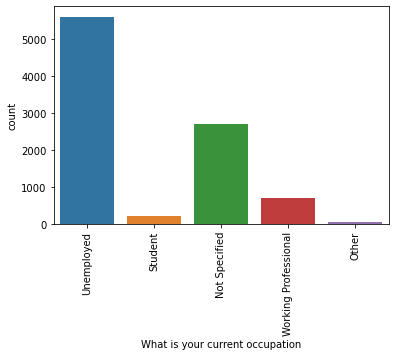

In [44]:
# Ploting 'What matters most to you in choosing a course'
plt.figure(figsize=(6,4))
sns.countplot(leads_df['What is your current occupation'])
plt.xticks(rotation=90)
plt.show()

In [45]:
# Lets check again for remaining columns

round((100*leads_df.isnull().sum()/len(leads_df)),2).sort_values(ascending=False)

Country                                     26.63
TotalVisits                                  1.48
Page Views Per Visit                         1.48
Lead Source                                  0.39
Lead Origin                                  0.00
X Education Forums                           0.00
I agree to pay the amount through cheque     0.00
Get updates on DM Content                    0.00
Update me on Supply Chain Content            0.00
Receive More Updates About Our Courses       0.00
Through Recommendations                      0.00
Digital Advertisement                        0.00
Newspaper                                    0.00
Search                                       0.00
Newspaper Article                            0.00
Magazine                                     0.00
What is your current occupation              0.00
Specialization                               0.00
Total Time Spent on Website                  0.00
Converted                                    0.00


#### 4.4.5. Handling for `Country`

In [46]:
# Lets check each valid value count including null

leads_df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
China                      2
Philippines                2
Bangladesh                 2
Uganda                     2
Netherlands                2
Italy                      2
Asia/Pacific Region        2
Ghana                      2
Belgium                    2
Sri Lanka                  1
Denmark                    1
Indonesia                  1
Liberia                    1
Switzerland                1
Kenya         

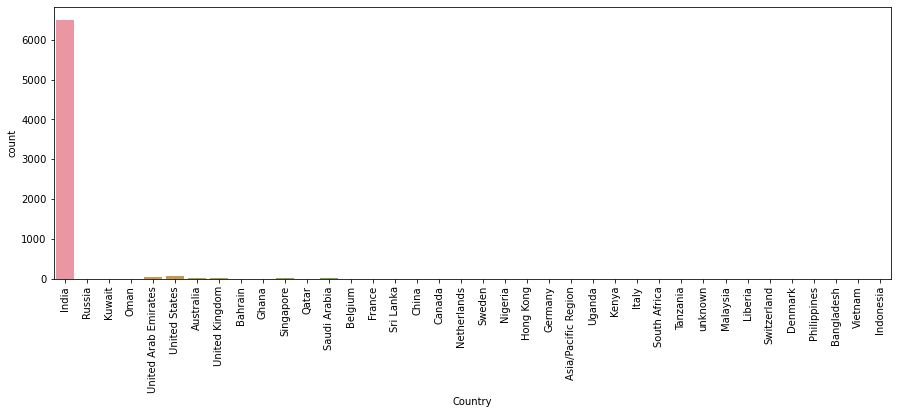

In [47]:
# Ploting 'Country'
plt.figure(figsize=(15,5))
sns.countplot(leads_df['Country'])
plt.xticks(rotation=90)
plt.show()

**Insights**: 
 - We can see almost 26% data missing and 'India' is most common value covering almost ~ 65% of data.
 - Even if we replace null value with 'India', we will have more than 90% data only for 'India' which will not help for predication.
    So better to drop this column.

In [48]:
leads_df.drop('Country',axis=1,inplace=True)

In [49]:
# Lets check again for remaining columns

round((100*leads_df.isnull().sum()/len(leads_df)),2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Lead Source                                 0.39
Lead Origin                                 0.00
X Education Forums                          0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
Magazine                                    0.00
Newspaper Article                           0.00
Search                                      0.00
What is your current occupation             0.00
Specialization                              0.00
Total Time Spent on Website                 0.00
Converted                                   0.00
Do Not Call                                 0.00
Do Not Email        

#### 4.4.6. Handling for `TotalVisits`

In [50]:
# Checking data distribution for this numerical column

leads_df.TotalVisits.describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

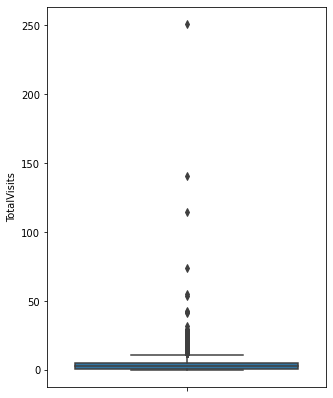

In [51]:
# Visualizing using box plot

plt.figure(figsize=(5,7))
sns.boxplot(y=leads_df['TotalVisits'])
plt.show()

**Insights**: 
 - We can see outliers for this column . So better to use 'Median' for replacing null value which is ~2% of data.

In [52]:
# Replacing Null Values with median
leads_df['TotalVisits']=leads_df['TotalVisits'].replace(np.nan,leads_df['TotalVisits'].median())

In [53]:
# Lets check again for remaining columns

round((100*leads_df.isnull().sum()/len(leads_df)),2).sort_values(ascending=False)

Page Views Per Visit                        1.48
Lead Source                                 0.39
Lead Origin                                 0.00
Newspaper Article                           0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Magazine                                    0.00
Search                                      0.00
What is your current occupation             0.00
Specialization                              0.00
Total Time Spent on Website                 0.00
TotalVisits                                 0.00
Converted                                   0.00
Do Not Call                                 0.00
Do Not Email        

#### 4.4.7. Handling for `Page Views Per Visit`

In [54]:
# Checking data distribution for this numerical column

leads_df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

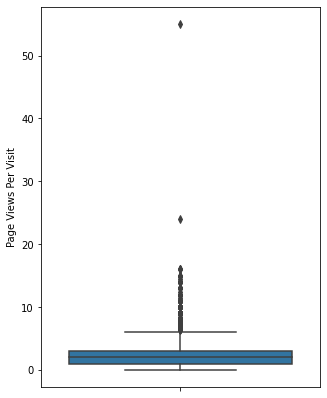

In [55]:
# Visualizing using box plot

plt.figure(figsize=(5,7))
sns.boxplot(y=leads_df['Page Views Per Visit'])
plt.show()

**Insights**: 
 - Here also ,We can see outliers. So better to use 'Median' for replacing null value which is ~1.5% of data.

In [56]:
# Replacing Null Values with median
leads_df['Page Views Per Visit']=leads_df['Page Views Per Visit'].replace(np.nan,leads_df['Page Views Per Visit'].median())

In [57]:
# Lets check again for remaining columns

round((100*leads_df.isnull().sum()/len(leads_df)),2).sort_values(ascending=False)

Lead Source                                 0.39
Lead Origin                                 0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Newspaper Article                           0.00
Magazine                                    0.00
Search                                      0.00
What is your current occupation             0.00
Specialization                              0.00
Page Views Per Visit                        0.00
Total Time Spent on Website                 0.00
TotalVisits                                 0.00
Converted                                   0.00
Do Not Call                                 0.00
Do Not Email        

#### 4.4.8. Handling for `Lead Source`

In [58]:
# Lets check each valid value count including null

leads_df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
WeLearn                 1
blog                    1
NC_EDM                  1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64

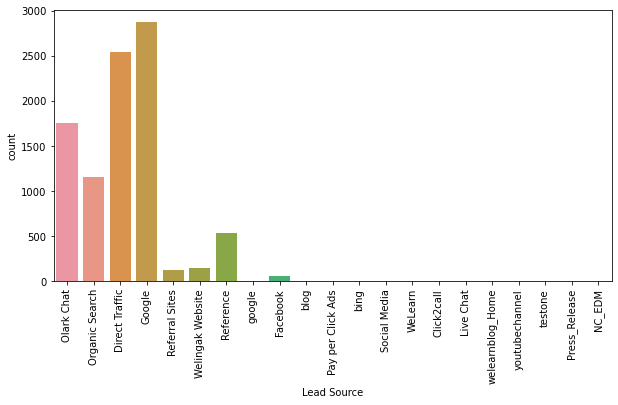

In [59]:
# Ploting 'Lead Source'
plt.figure(figsize=(10,5))
sns.countplot(leads_df['Lead Source'])
plt.xticks(rotation=90)
plt.show()

**Insights**: 
 - We can replace null value with maximum occuring value `Google` as null count is very low.
 - There is another valid value in `Google` i.e. `google`. This also need to be handled. 
 - Also we can see data imbalance for some valid values because of low count. We can merge those valid value to `Others`.

In [60]:
leads_df['Lead Source']=leads_df['Lead Source'].replace(np.nan,leads_df['Lead Source'].mode()[0])
leads_df['Lead Source']=leads_df['Lead Source'].replace('google',leads_df['Lead Source'].mode()[0])

In [61]:
leads_df['Lead Source']=leads_df['Lead Source'].replace(['Facebook','bing','Click2call','Live Chat','Press_Release','Social Media','welearnblog_Home','Pay per Click Ads','youtubechannel','blog','WeLearn','NC_EDM','testone'],'Others')

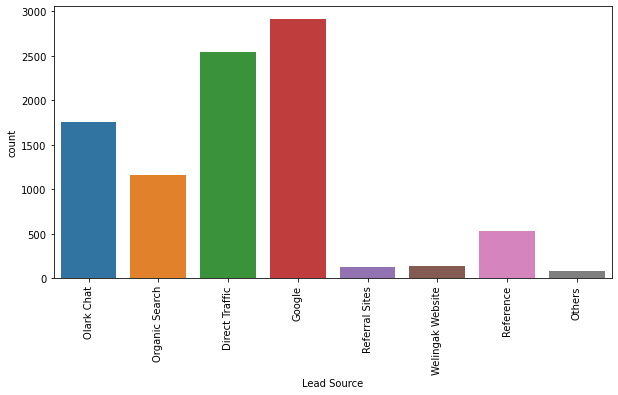

In [62]:
# Ploting 'Lead Source'
plt.figure(figsize=(10,5))
sns.countplot(leads_df['Lead Source'])
plt.xticks(rotation=90)
plt.show()

In [63]:
# Lets check again for remaining columns

round((100*leads_df.isnull().sum()/len(leads_df)),2).sort_values(ascending=False)

Lead Origin                                 0.0
Lead Source                                 0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                                   0.0
Do Not Call                                 0.0
Do Not Email                            

**Insights**
  - Now we have almost handled all columns with null values. We still have some columns with negligible null count.
  - We will check those remaining columns for data distribution . If we will find any imbalance in data then will drop them.

#### 4.4.9. Handling for `Lead Origin`

In [64]:
# Checking Lead Origin
leads_df['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

**Insights**
  - Here we can see 2 dominanting valid values (Landing Page Submission,API) followed by 3 others will comparatively lower count . We can merge below 2 low counts valid values.

In [65]:
leads_df['Lead Origin']=leads_df['Lead Origin'].replace(['Lead Import','Quick Add Form'],'Others')

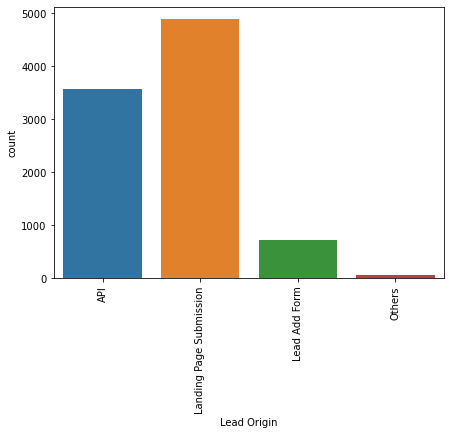

In [66]:
# Ploting 'Lead Source'
plt.figure(figsize=(7,5))
sns.countplot(leads_df['Lead Origin'])
plt.xticks(rotation=90)
plt.show()

#### 4.4.10. Handling for `Newspaper Article`

In [67]:
leads_df['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

**Insights**
  - Here , we have data imbalance with majority of 'No'. We can drop this column as it will not help for prediction.

In [68]:
leads_df.drop('Newspaper Article',axis=1,inplace=True)

#### 4.4.11. Handling for `A free copy of Mastering The Interview`

In [69]:
leads_df['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

**Insights**
  - Here , we can see balance in data. So keepting it for modeling.

#### 4.4.12. Handling for `I agree to pay the amount through cheque`

In [70]:
leads_df['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

**Insights**
  - Here , We have only one valid value so we can drop this column.

In [71]:
leads_df.drop('I agree to pay the amount through cheque',axis=1,inplace=True)

#### 4.4.13. Handling for `Get updates on DM Content`

In [72]:
leads_df['Get updates on DM Content'].value_counts(dropna=False)

No    9240
Name: Get updates on DM Content, dtype: int64

**Insights**
  - Here also, We have only one valid value so this column is eligible for drop.

In [73]:
leads_df.drop('Get updates on DM Content',axis=1,inplace=True)

#### 4.4.14. Handling for `Update me on Supply Chain Content`

In [74]:
leads_df['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

**Insights**
  - Here also, We have only one valid value so this column is eligible for drop.

In [75]:
leads_df.drop('Update me on Supply Chain Content',axis=1,inplace=True)

#### 4.4.15. Handling for `Receive More Updates About Our Courses`

In [76]:
leads_df['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

**Insights**
  - Here also, We have only one valid value so this column is eligible for drop.

In [77]:
leads_df.drop('Receive More Updates About Our Courses',axis=1,inplace=True)

#### 4.4.16. Handling for `Through Recommendations`

In [78]:
leads_df['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

**Insights**
  - Here , we have data imbalance with majority of 'No'. We can drop this column as it will not help for prediction.

In [79]:
leads_df.drop('Through Recommendations',axis=1,inplace=True)

#### 4.4.17. Handling for `Digital Advertisement`

In [80]:
leads_df['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

**Insights**
  - Here , we have data imbalance with majority of 'No'. We can drop this column as it will not help for prediction.

In [81]:
leads_df.drop('Digital Advertisement',axis=1,inplace=True)

#### 4.4.18. Handling for `Newspaper`

In [82]:
leads_df['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

**Insights**
  - Here , we have data imbalance with majority of 'No'. We can drop this column as it will not help for prediction.

In [83]:
leads_df.drop('Newspaper',axis=1,inplace=True)

#### 4.4.19. Handling for `X Education Forums`

In [84]:
leads_df['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

**Insights**
  - Here , we have data imbalance with majority of 'No'. We can drop this column as it will not help for prediction.

In [85]:
leads_df.drop('X Education Forums',axis=1,inplace=True)

#### 4.4.20. Handling for `Magazine`

In [86]:
leads_df['Magazine'].value_counts(dropna=False)

No    9240
Name: Magazine, dtype: int64

**Insights**
  - Here, We have only one valid value so this column is eligible for drop.

In [87]:
leads_df.drop('Magazine',axis=1,inplace=True)

#### 4.4.21. Handling for `Search`

In [88]:
leads_df['Search'].value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

**Insights**
  - Here , we have data imbalance with majority of 'No'. We can drop this column as it will not help for prediction.

In [89]:
leads_df.drop('Search',axis=1,inplace=True)

#### 4.4.22. Handling for `Do Not Call`

In [90]:
leads_df['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

**Insights**
  - Here , we have data imbalance with majority of 'No'. We can drop this column as it will not help for prediction.

In [91]:
leads_df.drop('Do Not Call',axis=1,inplace=True)

#### 4.4.23. Handling for `Do Not Email`

In [92]:
leads_df['Do Not Email'].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

**Insights**
  - Here , we see sightly data imbalance. So we will keep this column.

#### Now we have handled all columns . Let's see final dataframe.

In [93]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Specialization                          9240 non-null   object 
 8   What is your current occupation         9240 non-null   object 
 9   A free copy of Mastering The Interview  9240 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 722.0+ KB


# 5. Data Analysis And Data Preparation

## 5.1. Univariate Analysis for target variable 'Converted'

### 5.1.1 Univariate Analysis with categorical variable

In [94]:
#defining one common function for categorical column analysis with target column 'Converted'
def categorical_analysis(var):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=leads_df,x=var,hue=leads_df['Converted'])
    plt.xticks(rotation = 90)
    plt.show()

#### 1. Lead Origin 

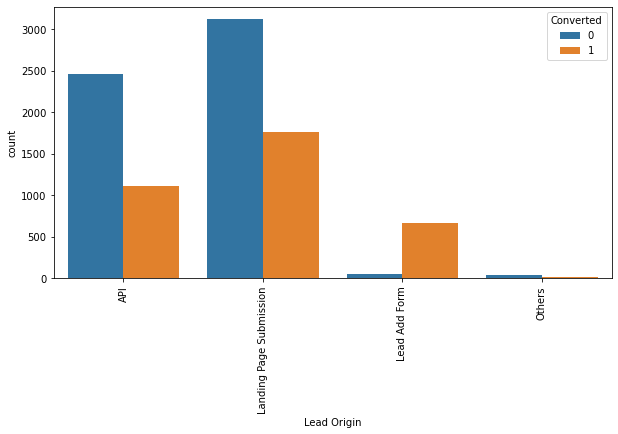

In [95]:
categorical_analysis('Lead Origin')

**Insights:**
  - For API and Landing page submission , lead coversion count is almost half as compared to non-conversion count. Hence we can say , there is only 30 -35 % coversion rate . But count of lead originated from these points are high.
  - For 'Lead Add Form' , we can say conversion rate is significantly high. But count of lead originated is not very high.
  - To improve conversion rate , we need to focus on below two things:
    - Improving conversion rate of lead origin `API` and `Landing Page Submission`.
    - Improving count of lead generation from `Lead Add From`.
    

#### 2. Lead Source 

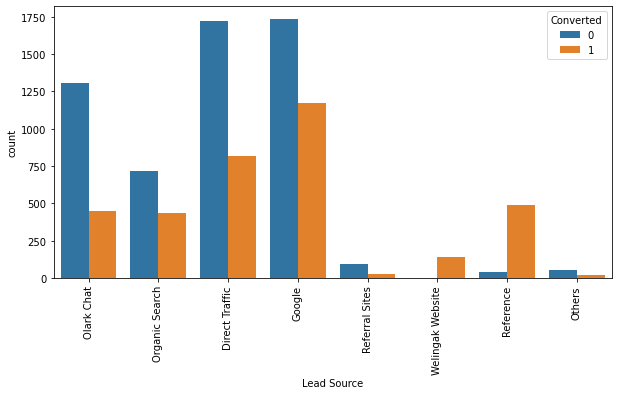

In [96]:
categorical_analysis('Lead Source')

**Insights:**
  - Maximum leads are getting generated from `Google` and `Direct Traffic`. While `Google` has better leads conversion rate as compare to `Direct Traffic`.
  - Leads conversion rate from `Refernce` and `welingak website` are significantly high.
  - To improve conversion rate , we need to focus on below things:
    - Improving conversion rate of lead source `Google` and `Direct Traffic`.
    - Improving conversion rate of lead source `olark chat` and `organic search` as we have significant count of lead generation from these two sources.
    - Improving count of lead generation from `Refernce` and `welingak website` as these are having good conversion rate.

#### 3. Do Not Email

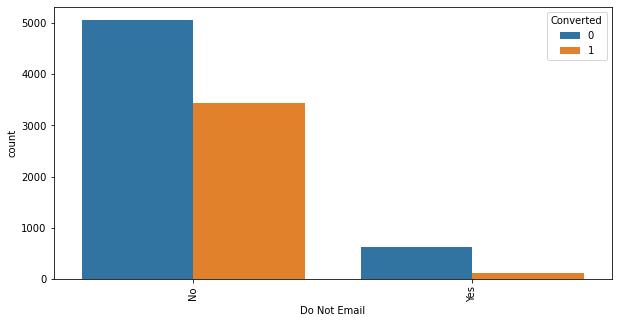

In [97]:
categorical_analysis('Do Not Email')

**Insights:**
  - Maximum leads are getting generated where Do Not Email is opted as `No` thouogh conversion rate is not that good.
  - We need to focus on improving conversion rate of those leads where Do Not Email is opted as `No`.

#### 5. Specialization

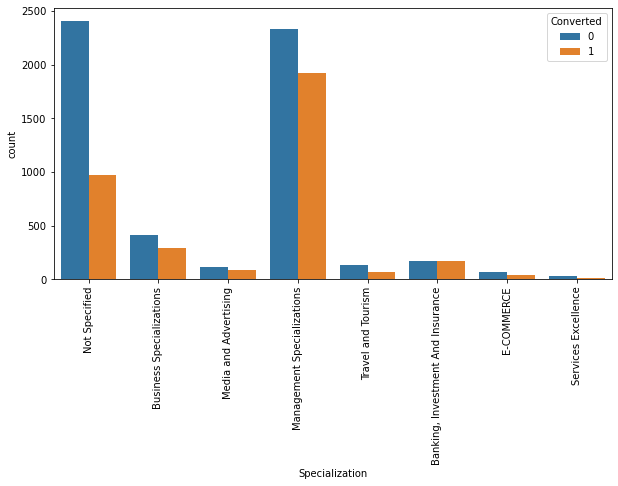

In [98]:
categorical_analysis('Specialization')

**Insights:**
  - Customers belonging to `Management Specializtion` are responding good . We have high leads conversion rate there.
  - Customers belonging to `Banking , Investment and Insurance` are having mix response. We have almost 50% coneversion rate.
  - Customers with `Services Excellence` specialization are showing very low conversion rate. 

#### 6. What is your current occupation

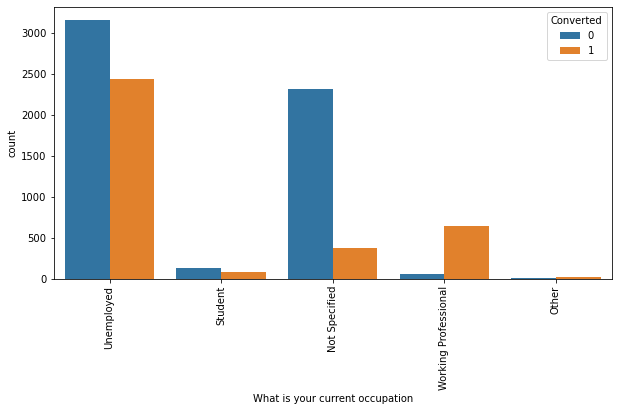

In [99]:
categorical_analysis('What is your current occupation')

**Insights:**
  - `Working professional` are having good conversion rates while from `Unemployed` are holding most leads
  - To improve conversion rate , we need to focus on below things:
    - Improving conversion rate for `Unemployed`.
    - Improving leads generation from `Working professional`.

#### 8. A free copy of Mastering The Interview

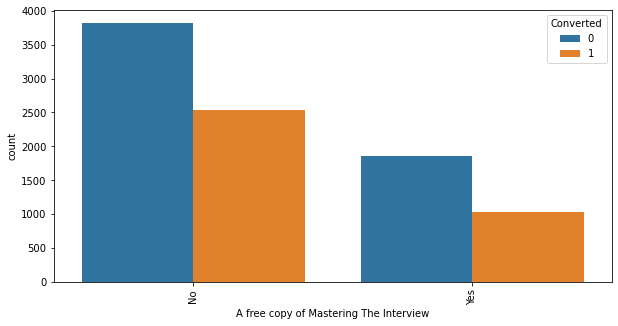

In [100]:
categorical_analysis('A free copy of Mastering The Interview')

**Insights:**
   - For both value `Yes` and `No` , leads conversion rate is not that good but 'Yes' is having better conevrsion rate as compare to `No` thouogh we have more leads from `No`.

### 5.1.2 Univariate Analysis with numerical variable

In [101]:
#defining one common function for numerical column analysis with target column 'Converted'
def numerical_analysis(var):
    plt.figure(figsize=(5,7))
    sns.boxplot(data=leads_df,y=var,x='Converted')
    plt.show()

#### 1. TotalVisits

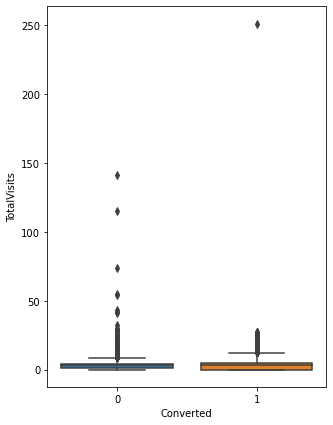

In [102]:
numerical_analysis('TotalVisits')

**Insights :** 
   - We can see outliers present . This need to be handled.

In [103]:
leads_df['TotalVisits'].describe(percentiles = [0.05,0.25,0.5,0.75,0.90,0.99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

**Insights**
 - We can see top 1% is holding outliers. We can remove this.

In [104]:
# Removing the top 1%
leads_df= leads_df[(leads_df['TotalVisits'] <= leads_df['TotalVisits'].quantile(0.99))]

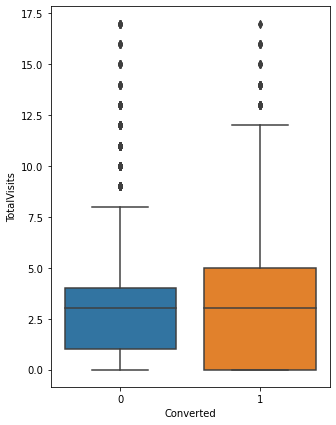

In [105]:
numerical_analysis('TotalVisits')

**Insights**
 - Converted Leads are having more TotalVisits although median for both is same.

#### 2 .Total Time Spent on Website

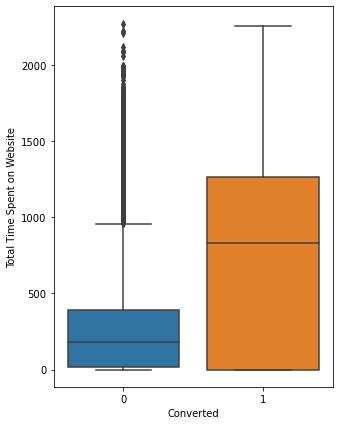

In [106]:
numerical_analysis('Total Time Spent on Website')

**Insights**
 - Converted Leads are having more `Total Time Spent on Website`.

#### 3 . Page Views Per Visit

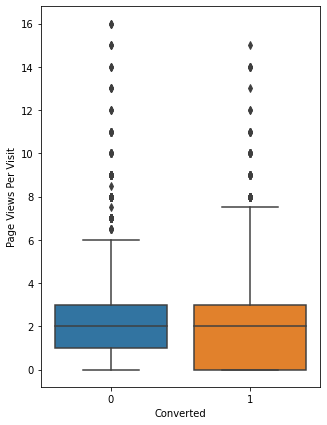

In [107]:
numerical_analysis('Page Views Per Visit')

**Insights :** 
   - We can see some outliers present . This need to be handled.

In [108]:
leads_df['Page Views Per Visit'].describe(percentiles = [0.05,0.25,0.5,0.75,0.90,0.99])

count    9157.000000
mean        2.332225
std         2.047285
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

**Insights**
 - We can see only top 1% is holding outliers. We can remove this.

In [109]:
# Removing the top 1%
leads_df= leads_df[(leads_df['Page Views Per Visit'] <= leads_df['Page Views Per Visit'].quantile(0.99))]

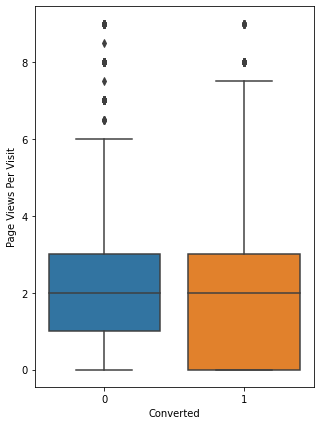

In [110]:
numerical_analysis('Page Views Per Visit')

**Insights**
 - We can see for converted and Non-converted ,medians are almost same.

## 5.2. Handling binary valued categorical columns

- before proceeding for modeling , we need to handle categorical columns for converting its value to numerical.

In [111]:
# Defining function for binary value conversion

def binary_mapp(var):
    return var.map({'Yes':1,'No':0})

In [112]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9090 non-null   object 
 1   Lead Source                             9090 non-null   object 
 2   Do Not Email                            9090 non-null   object 
 3   Converted                               9090 non-null   int64  
 4   TotalVisits                             9090 non-null   float64
 5   Total Time Spent on Website             9090 non-null   int64  
 6   Page Views Per Visit                    9090 non-null   float64
 7   Specialization                          9090 non-null   object 
 8   What is your current occupation         9090 non-null   object 
 9   A free copy of Mastering The Interview  9090 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.0+ MB


- We have 'Do Not Email' and 'A free copy of Mastering The Interview' with binary values. Lets apply function on them.

In [113]:
leads_df['Do Not Email']=binary_mapp(leads_df['Do Not Email'])

In [114]:
leads_df['A free copy of Mastering The Interview']=binary_mapp(leads_df['A free copy of Mastering The Interview'])

## 5.3. Handling multi - valued categorical columns

In [115]:
# Creating a dummy variable for multivalued categorical columns and dropping the first one.

dummy_df=pd.get_dummies(leads_df[['Lead Origin','Lead Source','Specialization','What is your current occupation']], drop_first=True)
dummy_df.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Specializations,Specialization_E-COMMERCE,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


- Now we can concatenate this dummy dataframe to Leads_df

In [116]:
leads_df=pd.concat([leads_df,dummy_df],axis=1)

In [117]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Specializations,Specialization_E-COMMERCE,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,Not Specified,Unemployed,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,API,Organic Search,0,0,5.0,674,2.5,Not Specified,Unemployed,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Business Specializations,Student,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Media and Advertising,Unemployed,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Not Specified,Unemployed,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


- Lets drop original columns belonging to multivalued catergorical category

In [118]:
leads_df.drop(['Lead Origin','Lead Source','Specialization','What is your current occupation'],axis=1,inplace=True)

In [119]:
leads_df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Specializations,Specialization_E-COMMERCE,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [120]:
leads_df.shape

(9090, 27)

#### Now we have perfect data frame to start modeling . Lets proceed with data split

## 5.4. Train-Test data split for modeling

In [121]:
y=leads_df['Converted']
X=leads_df.drop('Converted',axis=1)

In [122]:
## Splitting data set to train and test

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=100)

In [123]:
X_train.shape

(6363, 26)

In [124]:
X_test.shape

(2727, 26)

- before proceeding for model building , we need to scale numerical columns

## 5.5. Feature Scaling for train dataset

In [125]:
# We will perfrom scaling on numerical columns 

# Creating object for StandardScaler
scaler=StandardScaler()

# Using this object for fitting and transforming train numerical columns

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [126]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Specializations,Specialization_E-COMMERCE,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
302,0,1.336782,-0.428736,0.044021,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
6087,1,-1.094877,-0.887355,-1.206716,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1033,0,0.642022,-0.025151,1.477269,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
7656,1,0.989402,-0.241619,2.014065,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3241,0,0.294642,0.897591,-0.492776,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


# 6. Model Building

- Model 1

### 6.1. Model building using Statsmodel

In [127]:
# We will start with statsmodel

log_m1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())

In [128]:
log_m1=log_m1.fit()

In [129]:
log_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2801.7
Date:                Wed, 09 Feb 2022   Deviance:                       5603.3
Time:                        17:46:24   Pearson chi2:                 7.30e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3998      0.240     -5.828      0.000      -1.871      -0.929
Do Not Email                                            -1.2262      0.164     -7.476      0.000      -1.548      -0.905
TotalVisits                                              0.1754      0.047      3.757      0.000       0.084       0.267
Total Time Spent on Website                              1.0606      0.039     27.254      0.000       0.984       1.137
Page Views Per Visit                                    -0.0690      0.054     -1.285      0.199      -0.174       0.036
A free copy of Mastering The Interview                  -0.1497      0.105     -1.430      0.153      -0.355       0.056
Lead Origin_Landing Page Submission                     -0.4926      0.132     -3.739      0.000      -0.751      -0.234
Lead Origin_Lead Add Form                                4.1423      0.650      6.371      0.000       2.868       5.417
Lead Origin_Others                                      -1.0159      0.822     -1.235      0.217      -2.628       0.596
Lead Source_Google                                       0.2865      0.110      2.602      0.009       0.071       0.502
Lead Source_Olark Chat                                   1.2552      0.156      8.043      0.000       0.949       1.561
Lead Source_Organic Search                               0.1250      0.126      0.995      0.320      -0.121       0.371
Lead Source_Others                                       0.6995      0.667      1.048      0.295      -0.608       2.008
Lead Source_Reference                                   -0.7273      0.680     -1.070      0.285      -2.060       0.606
Lead Source_Referral Sites                               0.0219      0.336      0.065      0.948      -0.637       0.681
Lead Source_Welingak Website                             2.6242      1.197      2.192      0.028       0.278       4.971
Specialization_Business Specializations                 -0.3016      0.204     -1.479      0.139      -0.701       0.098
Specialization_E-COMMERCE                                0.1708      0.343      0.497      0.619      -0.502       0.844
Specialization_Management Specializations               -0.2251      0.174     -1.292      0.196      -0.567       0.116
Specialization_Media and Advertising                    -0.2175      0.276     -0.789      0.430      -0.758       0.323
Specialization_Not Specified                            -1.0125      0.203     -4.985      0.000      -1.411      -0.614
Specialization_Services Excellence                      -0.4502      0.590     -0.763      0.445      -1.606       0.706
Specialization_Travel and Tourism                       -0

**Insights:**
- Here we can see lots of columns with no significance as P value is super high.
- Now first we will use "RFE" (Recursive Feature Elimination) from scikit-learn for getting all significant columnss which we can use as part of model building .Then we can proceed with statsmodel for making model more effcient.

### 6.2 Model feature selection using RFE

In [130]:
# We will create object for logistic regression

log_reg=LogisticRegression()

In [131]:
# will check for Top 15 significant features using RFE

rfe=RFE(log_reg ,15)

In [132]:
rfe=rfe.fit(X_train,y_train)

In [133]:
## Lets check the list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 6),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 11),
 ('A free copy of Mastering The Interview', False, 5),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Others', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 10),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 12),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Specializations', False, 7),
 ('Specialization_E-COMMERCE', True, 1),
 ('Specialization_Management Specializations', False, 8),
 ('Specialization_Media and Advertising', False, 9),
 ('Specialization_Not Specified', True, 1),
 ('Specialization_Services Excellence', False, 3),
 ('Specialization_Travel and Tourism', False, 2),
 ('What is your current occupation_Other', True, 1),


In [134]:
#Features selected by RFE

X_train.columns[rfe.support_]

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Others', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Others', 'Lead Source_Welingak Website',
       'Specialization_E-COMMERCE', 'Specialization_Not Specified',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [135]:
#Features not selected by RFE

X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Specialization_Business Specializations',
       'Specialization_Management Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism'],
      dtype='object')

- Now as we have all Top 15 features , we can again proceed with statsmodel for new model building

- Model 2

In [136]:
# getting list of all columns

col=X_train.columns[rfe.support_]

In [137]:
# Taking only data considering above columns

X_train_sm=sm.add_constant(X_train[col])

In [138]:
# Lets build model again

log_m2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())

In [139]:
log_m2=log_m2.fit()

In [140]:
log_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2813.5
Date:                Wed, 09 Feb 2022   Deviance:                       5627.1
Time:                        17:46:25   Pearson chi2:                 7.28e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5969      0.152    -10.478      0.000      -1.896      -1.298
Do Not Email                                            -1.2303      0.160     -7.666      0.000      -1.545      -0.916
Total Time Spent on Website                              1.0672      0.039     27.506      0.000       0.991       1.143
Lead Origin_Landing Page Submission                     -0.5630      0.126     -4.475      0.000      -0.810      -0.316
Lead Origin_Lead Add Form                                3.3703      0.211     15.980      0.000       2.957       3.784
Lead Origin_Others                                      -1.1420      0.806     -1.416      0.157      -2.722       0.438
Lead Source_Google                                       0.3280      0.078      4.214      0.000       0.175       0.481
Lead Source_Olark Chat                                   1.1374      0.127      8.969      0.000       0.889       1.386
Lead Source_Others                                       0.7432      0.644      1.153      0.249      -0.520       2.006
Lead Source_Welingak Website                             3.2727      1.026      3.191      0.001       1.263       5.283
Specialization_E-COMMERCE                                0.3850      0.300      1.281      0.200      -0.204       0.974
Specialization_Not Specified                            -0.7888      0.118     -6.692      0.000      -1.020      -0.558
What is your current occupation_Other                    2.2454      0.544      4.125      0.000       1.179       3.312
What is your current occupation_Student                  1.0153      0.222      4.565      0.000       0.579       1.451
What is your current occupation_Unemployed               1.2945      0.085     15.226      0.000       1.128       1.461
What is your current occupation_Working Professional     3.6663      0.195     18.808      0.000       3.284       4.048
========================================================================================================================
"""

- These below features are still insignificant :
    - Lead Source_Others
    - Specialization_E-COMMERCE
    - Lead Origin_Others
    
- Lets drop them and rebuild model.

In [141]:
# Dropping the variables with p-values greater than 0.05
col = col.drop(['Lead Source_Others', 'Specialization_E-COMMERCE','Lead Origin_Others'])
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Specialization_Not Specified',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

- Model 3

In [142]:
# Taking final list of columns for X_train
X_train_sm=sm.add_constant(X_train[col])
log_m3=sm.GLM(y_train,X_train_sm,family= sm.families.Binomial())
log_m3=log_m3.fit()
log_m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2815.2
Date:                Wed, 09 Feb 2022   Deviance:                       5630.5
Time:                        17:46:25   Pearson chi2:                 7.29e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5982      0.151    -10.574      0.000      -1.894      -1.302
Do Not Email                                            -1.2319      0.161     -7.661      0.000      -1.547      -0.917
Total Time Spent on Website                              1.0653      0.039     27.526      0.000       0.989       1.141
Lead Origin_Landing Page Submission                     -0.5490      0.125     -4.399      0.000      -0.794      -0.304
Lead Origin_Lead Add Form                                3.3805      0.210     16.095      0.000       2.969       3.792
Lead Source_Google                                       0.3262      0.077      4.221      0.000       0.175       0.478
Lead Source_Olark Chat                                   1.1403      0.125      9.094      0.000       0.895       1.386
Lead Source_Welingak Website                             3.2657      1.026      3.185      0.001       1.256       5.276
Specialization_Not Specified                            -0.7903      0.118     -6.717      0.000      -1.021      -0.560
What is your current occupation_Other                    2.2445      0.543      4.131      0.000       1.180       3.309
What is your current occupation_Student                  1.0134      0.223      4.553      0.000       0.577       1.450
What is your current occupation_Unemployed               1.2928      0.085     15.207      0.000       1.126       1.459
What is your current occupation_Working Professional     3.6614      0.195     18.790      0.000       3.279       4.043
========================================================================================================================
"""

- Now all columns seem significant. Lets check VIF also.

In [143]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,2.66
7,Specialization_Not Specified,2.41
2,Lead Origin_Landing Page Submission,2.38
5,Lead Source_Olark Chat,2.02
3,Lead Origin_Lead Add Form,1.70
4,Lead Source_Google,1.63
11,What is your current occupation_Working Professional,1.33
6,Lead Source_Welingak Website,1.32
1,Total Time Spent on Website,1.26
0,Do Not Email,1.11


- We need a VIF that is less than 5. Here all columns seem fine.

In [144]:
# predicting values on the train dataset

y_train_pred=log_m3.predict(X_train_sm)

In [145]:
y_train_pred=y_train_pred.values.reshape(-1)

- Lets create one dataframe with actual converted value and predicted probability

In [146]:
y_train_final_pred=pd.DataFrame({'Converted':y_train.values,'Converted_Probability':y_train_pred})

In [147]:
y_train_final_pred.head()

,Converted,Converted_Probability
0,0,0.054930
1,0,0.031511
2,0,0.310820
3,0,0.087567
4,1,0.525422


In [148]:
# adding index to data frame

y_train_final_pred['Prospect ID']=y_train.index

In [149]:
y_train_final_pred.head()

,Converted,Converted_Probability,Prospect ID
0,0,0.054930,302
1,0,0.031511,6087
2,0,0.310820,1033
3,0,0.087567,7656
4,1,0.525422,3241


- Now we can create new column 'Predicted' with 1 and 0 for more 0.5 and less than 0.5

In [150]:
y_train_final_pred['Predicted']=y_train_final_pred['Converted_Probability'].map(lambda x: 1 if x > 0.5 else 0)

In [151]:
y_train_final_pred.head()

,Converted,Converted_Probability,Prospect ID,Predicted
0,0,0.054930,302,0
1,0,0.031511,6087,0
2,0,0.310820,1033,0
3,0,0.087567,7656,0
4,1,0.525422,3241,1


- Lets proceed with visualizing confusion matrix

In [152]:
from sklearn import metrics
res=metrics.confusion_matrix(y_train_final_pred['Converted'],y_train_final_pred['Predicted'])

In [153]:
res

array([[3517,  418],
       [ 841, 1587]], dtype=int64)

In [154]:
# Lets check accuracy score of model

metrics.accuracy_score(y_train_final_pred['Converted'],y_train_final_pred['Predicted'])

0.8021373565928022

In [155]:
# Lets check sensitivity and specificity

# true positive
tp=res[1,1]

#true negative
tn=res[0,0]

#false positive
fp=res[0,1]

#false negative
fn=res[1,0]

- Sensitivity

In [156]:
tp/float(tp+fn)

0.6536243822075782

- Specificy

In [157]:
tn/float(tn+fp)

0.8937738246505718

- Positive Predictive Value 

In [158]:
tp/float(tp+fp)

0.7915211970074812

- Negative Predictive Value 

In [159]:
tn/float(tn+fn)

0.8070215695273061

### Plotting ROC curve

In [160]:
# for visualizung tradeoff between sensitivity and specificity

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [161]:
fpr,tpr,thresholds=metrics.roc_curve(y_train_final_pred.Converted, y_train_final_pred.Converted_Probability,drop_intermediate = False)

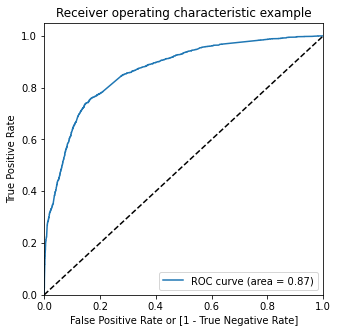

In [162]:
draw_roc(y_train_final_pred.Converted,y_train_final_pred.Converted_Probability)

### Finding Optimal Cutoff Point

In [163]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_final_pred[i]= y_train_final_pred.Converted_Probability.map(lambda x: 1 if x > i else 0)
y_train_final_pred.head()

,Converted,Converted_Probability,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.054930,302,0,1,0,0,0,0,0,0,0,0,0
1,0,0.031511,6087,0,1,0,0,0,0,0,0,0,0,0
2,0,0.310820,1033,0,1,1,1,1,0,0,0,0,0,0
3,0,0.087567,7656,0,1,0,0,0,0,0,0,0,0,0
4,1,0.525422,3241,1,1,1,1,1,1,1,0,0,0,0


In [164]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix(y_train_final_pred.Converted, y_train_final_pred[i] )
    total1=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total1
    
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    sensi = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381581  1.000000  0.000000
0.1   0.1  0.519409  0.982702  0.233545
0.2   0.2  0.699198  0.908567  0.570013
0.3   0.3  0.790979  0.778007  0.798983
0.4   0.4  0.808424  0.731054  0.856163
0.5   0.5  0.802137  0.653624  0.893774
0.6   0.6  0.787522  0.576606  0.917662
0.7   0.7  0.763948  0.476524  0.941296
0.8   0.8  0.732359  0.346376  0.970521
0.9   0.9  0.699198  0.225700  0.991360


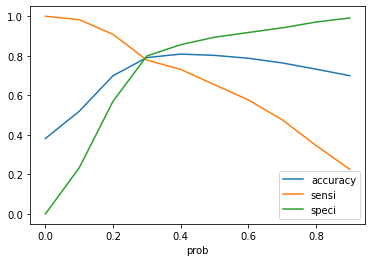

In [165]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- from above curve , we can see optimal point is around ~ 0.3

In [166]:
# lets use 0.3 as cut off 

y_train_final_pred['Final_Pred']=y_train_final_pred.Converted_Probability.map( lambda x: 1 if x > 0.3 else 0)

y_train_final_pred.head()

,Converted,Converted_Probability,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Pred
0,0,0.054930,302,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.031511,6087,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.310820,1033,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.087567,7656,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.525422,3241,1,1,1,1,1,1,1,0,0,0,0,1


In [167]:
# Lets check accuracy score of model

metrics.accuracy_score(y_train_final_pred['Converted'],y_train_final_pred['Final_Pred'])

0.7909790979097909

In [168]:
# Lets look at the confusion matrix again
res=metrics.confusion_matrix(y_train_final_pred['Converted'],y_train_final_pred['Final_Pred'])
res

array([[3144,  791],
       [ 539, 1889]], dtype=int64)

In [169]:
# Lets check sensitivity and specificity

# true positive
tp=res[1,1]

#true negative
tn=res[0,0]

#false positive
fp=res[0,1]

#false negative
fn=res[1,0]

- Sensitivity

In [170]:
tp/float(tp+fn)

0.7780065897858319

- Specificity

In [171]:
tn/float(tn+fp)

0.7989834815756035

- Positive Predictive Value 

In [172]:
tp/float(tp+fp)

0.7048507462686567

- Negative Predictive Value 

In [173]:
tn/float(tn+fn)

0.8536519142003801

### Checking Precision and Recall

In [174]:
##### Precision
tp/float(tp+fp)

0.7048507462686567

In [175]:
##### Recall
tp/float(tp+fn)

0.7780065897858319

#### Using sklearn utilities for the same calculation

In [176]:
precision_score(y_train_final_pred.Converted , y_train_final_pred.Final_Pred)

0.7048507462686567

In [177]:
recall_score(y_train_final_pred.Converted, y_train_final_pred.Final_Pred)

0.7780065897858319

#### Precision and Recall Tradeoff

In [178]:
p, r, thresholds = precision_recall_curve(y_train_final_pred.Converted, y_train_final_pred.Converted_Probability)

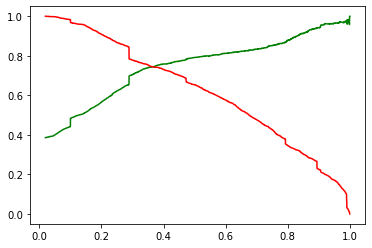

In [179]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

###  Predictions for the Test Set

In [180]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Specializations,Specialization_E-COMMERCE,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
6906,0,0.294642,1.919395,-0.133122,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1873,0,-0.400118,-0.546142,-0.133122,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
771,0,1.336782,-0.797465,2.550862,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4495,0,0.294642,-0.623190,0.940472,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
9061,0,-0.400118,2.392690,-0.133122,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [181]:
#Selecting final list of columns only 

X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Welingak Website,Specialization_Not Specified,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
6906,0,1.919395,1,0,0,0,0,0,0,0,1,0
1873,0,-0.546142,1,0,1,0,0,1,0,0,1,0
771,0,-0.797465,0,0,1,0,0,1,0,0,1,0
4495,0,-0.623190,1,0,1,0,0,0,0,0,1,0
9061,0,2.392690,1,0,0,0,0,0,0,0,0,0


In [182]:
# predicting values on the test dataset
X_test_sm=sm.add_constant(X_test)
y_test_pred=log_m3.predict(X_test_sm)

In [183]:
y_test_pred.head()

6906    0.766787
1873    0.130077
771     0.165343
4495    0.232898
9061    0.599086
dtype: float64

In [184]:
# Creating data frame using y_test_pred

test_pred=pd.DataFrame(y_test_pred)
test_pred.head()

,0
6906,0.766787
1873,0.130077
771,0.165343
4495,0.232898
9061,0.599086


In [185]:
# Creating data frame using y_test

test = pd.DataFrame(y_test)
test.head()

,Converted
6906,1
1873,0
771,0
4495,0
9061,1


In [186]:
# Adding index
test['Prospect ID'] = test.index

In [187]:
## Removing index for both dataframes to append them side by side 

test_pred.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [188]:
# Appending test_pred and test
y_pred_final = pd.concat([test, test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,6906,0.766787
1,0,1873,0.130077
2,0,771,0.165343
3,0,4495,0.232898
4,1,9061,0.599086


In [189]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Probability'})

In [190]:
y_pred_final.head()

,Converted,Prospect ID,Converted_Probability
0,1,6906,0.766787
1,0,1873,0.130077
2,0,771,0.165343
3,0,4495,0.232898
4,1,9061,0.599086


In [191]:
# applying cut off
y_pred_final['Final_Pred']=y_pred_final.Converted_Probability.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Converted,Prospect ID,Converted_Probability,Final_Pred
0,1,6906,0.766787,1
1,0,1873,0.130077,0
2,0,771,0.165343,0
3,0,4495,0.232898,0
4,1,9061,0.599086,1


In [192]:
# Lets check accuracy score

metrics.accuracy_score(y_pred_final['Converted'],y_pred_final['Final_Pred'])

0.7858452511917858

In [193]:
# Lets look at the confusion matrix 
res=metrics.confusion_matrix(y_pred_final['Converted'],y_pred_final['Final_Pred'])
res

array([[1327,  333],
       [ 251,  816]], dtype=int64)

In [194]:
# Lets check sensitivity and specificity

# true positive
tp=res[1,1]

#true negative
tn=res[0,0]

#false positive
fp=res[0,1]

#false negative
fn=res[1,0]

- Sensitivity

In [195]:
tp/float(tp+fn)

0.7647610121836926

- Specificity

In [196]:
tn/float(tn+fp)

0.7993975903614458

- Positive Predictive Value

In [197]:
tp/float(tp+fp)

0.7101827676240209

- Negative Predictive Value

In [198]:
tn/float(tn+fn)

0.8409378960709759

### Conclusions:

- Top 3 variables which are contributing the most to the model
 - What is your current occupation_Working Professional
    - This indicates that working professionals are more prone to be converting leads.
 - Lead Origin_Lead Add Form
    - This indicates that Leads originated form add form , are more likely to get converted.
 - Lead Source_Welingak Website
    - This indicated that from Welingak website are getting good number of convertable leads.

### Assigning lead score 

In [199]:
# Merging train and test prediction

all_pred = pd.concat([y_train_final_pred[["Prospect ID","Converted_Probability","Converted","Final_Pred"]],y_pred_final[["Prospect ID","Converted_Probability","Converted","Final_Pred"]]])
all_pred.shape

(9090, 4)

In [200]:
all_pred.shape

(9090, 4)

In [201]:
all_pred.head()

,Prospect ID,Converted_Probability,Converted,Final_Pred
0,302,0.054930,0,0
1,6087,0.031511,0,0
2,1033,0.310820,0,1
3,7656,0.087567,0,0
4,3241,0.525422,1,1


In [202]:
all_pred['Lead Score']=all_pred['Converted_Probability'].apply(lambda x:round(x*100))

In [203]:
all_pred.tail()

,Prospect ID,Converted_Probability,Converted,Final_Pred,Lead Score
2722,1939,0.317795,0,1,32
2723,1540,0.504925,1,1,50
2724,5198,0.094328,1,0,9
2725,8660,0.100340,0,0,10
2726,6219,0.210999,0,0,21


- Based on Lead Score , team can approach relevent leads